<a href="https://colab.research.google.com/github/Pramuuu/Futurense_ML/blob/main/03-08-2024%20campaign_performance_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solving problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title

In [ ]:
# importing requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss


In [ ]:
data = pd.read_excel('/content/updated_dataset.xlsx')
df = pd.DataFrame(data)
df

,dates,campaign_name,campaign_start_date,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,2024-04-29,USP_Search_APTNTSKA_250124,25-01-2024,--,6766.15,1250,220,0.176000,25.0,Google,GMAT/GRE
1,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,05-04-2024,#7 ( Graphic ) - Get A Free Pass,946.38,3154,9,0.285352,1.0,Facebook,USP-2_KA_TN_050424
2,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,05-04-2024,USP_S3_never-been-easier,170.40,2695,8,0.296846,0.0,Facebook,USP-2_KA_TN_050424
3,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,05-04-2024,USP_S4_Do-you-have,55.65,577,2,0.346620,0.0,Facebook,USP-2_KA_TN_050424
4,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,05-04-2024,USP_S1_We-guarantee,296.94,1466,10,0.682128,1.0,Facebook,USP-2_AP_TS_050424
...,...,...,...,...,...,...,...,...,...,...,...
28529,2024-03-12,USP_MS + Coop Campaign_240224,24-02-2024,USP_RG_VideoAd5,67.18,268,1,0.373134,0.0,Facebook,MS + Coop KA&TN Ad set - 240224
28530,2024-03-12,USP_MS + Coop Campaign_240224,24-02-2024,USP_RG_VideoAd5,50.65,75,1,1.333333,0.0,Facebook,MS + Coop All India Ad set - 240224
28531,2024-03-12,USP Study Abroad_Generic_240224,24-02-2024,USP_Webinar_Saturdayfuture - Copy,11.34,28,0,0.000000,0.0,Facebook,AP&TS Generic Leads Ad Set_240224
28532,2024-03-12,USP Study Abroad_Generic_240224,24-02-2024,USP_Webinar_Saturdayfuture - Copy,136.97,134,0,0.000000,0.0,Facebook,KA&TN Generic Leads Ad Set_240224


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Fill missing values
categorical_features = ['campaign_name', 'creative_name', 'platform', 'adset_name']
numerical_features = ['total_spent', 'impressions', 'clicks', 'click_through_rate']

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define features (X) and target variable (y)
X = data[categorical_features + numerical_features]
y = data['leads']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Create the full pipeline with preprocessor and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=1),
        'Recall': recall_score(y_test, y_pred, pos_label=1),
        'F1 Score': f1_score(y_test, y_pred, pos_label=1),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }

    return scores

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

# Evaluate models
models = [logistic_regression, decision_tree, random_forest, gradient_boosting]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    scores = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f'{name} Scores:')
    for metric, score in scores.items():
        print(f'{metric}: {score}')
    print('\n')


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define regression models
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'Mean Squared Error': mean_squared_error(y_test, y_pred),
        'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred)
    }

# Evaluate each model
for model, name in zip(models, model_names):
    scores = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f'{name} Scores:')
    for metric, score in scores.items():
        print(f'{metric}: {score}')
    print()


ValueError: could not convert string to float: 'US_Pathway_2_Lead_gen_2_091123'

In [ ]:
# Replace '--' or other non-numeric values in the 'total_spent', 'clicks', and 'leads' columns with NaN
data['total_spent'] = pd.to_numeric(data['total_spent'], errors='coerce')
data['clicks'] = pd.to_numeric(data['clicks'], errors='coerce')
data['leads'] = pd.to_numeric(data['leads'], errors='coerce')

# Calculate Cost per Click (CPC) and Cost per Lead (CPL)
data['CPC'] = data['total_spent'] / data['clicks']
data['CPL'] = data['total_spent'] / data['leads']

# Handle division by zero or NaN results
data['CPC'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data['CPL'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Summary statistics for CPC and CPL
cpc_summary = data['CPC'].describe()
cpl_summary = data['CPL'].describe()

# Display the first few rows of the dataset with CPC and CPL
print("Dataset with CPC and CPL:\n", data.head())

# Display summary statistics
print("\nCPC Summary Statistics:\n", cpc_summary)
print("\nCPL Summary Statistics:\n", cpl_summary)

Dataset with CPC and CPL:
        dates                        campaign_name campaign_start_date  \
0 2024-04-29           USP_Search_APTNTSKA_250124          25-01-2024   
1 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
2 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
3 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
4 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   

                      creative_name  total_spent  impressions  clicks  \
0                                --      6766.15         1250     220   
1  #7 ( Graphic ) - Get A Free Pass       946.38         3154       9   
2          USP_S3_never-been-easier       170.40         2695       8   
3                USP_S4_Do-you-have        55.65          577       2   
4               USP_S1_We-guarantee       296.94         1466      10   

   click_through_rate  leads  platform          adset_name         CPC  \
0            0.176000

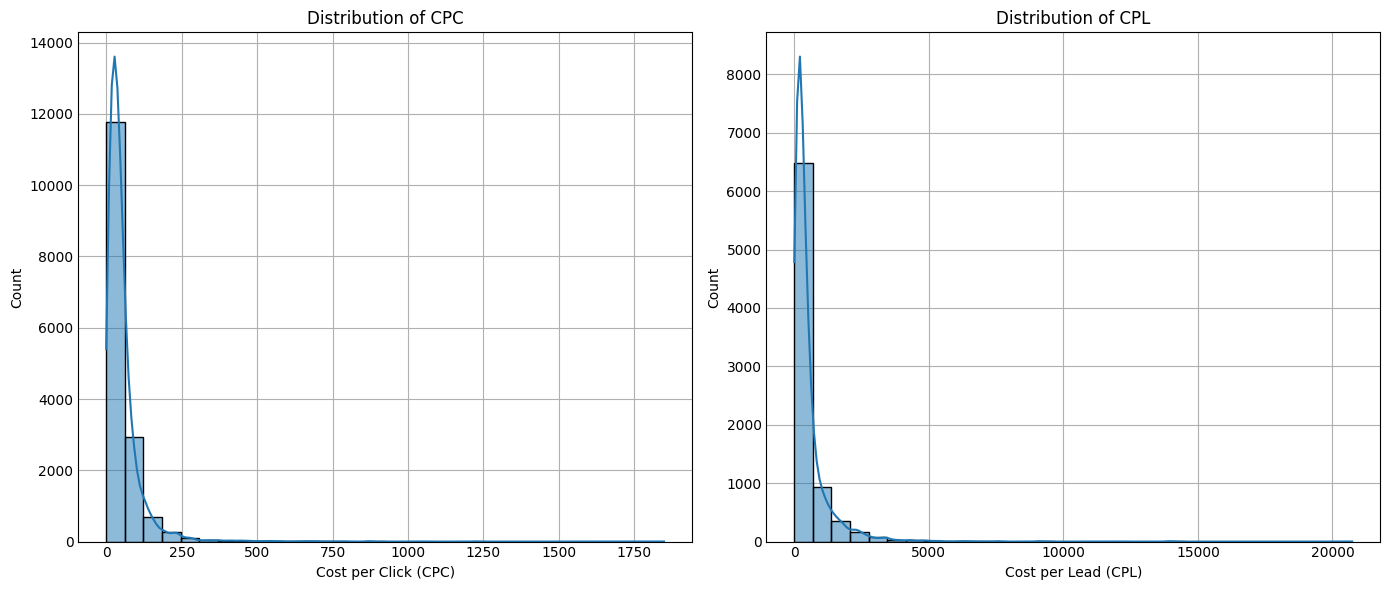

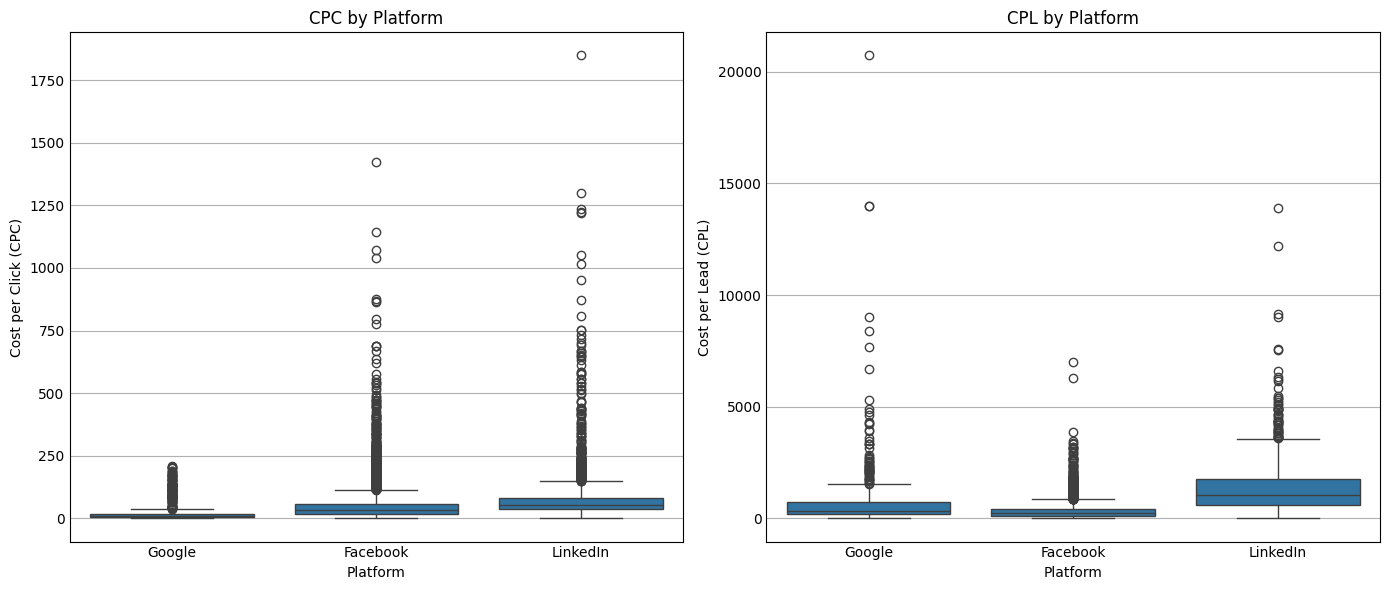

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot CPC and CPL distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['CPC'].dropna(), kde=True, bins=30)
plt.title('Distribution of CPC')
plt.xlabel('Cost per Click (CPC)')

plt.subplot(1, 2, 2)
sns.histplot(data['CPL'].dropna(), kde=True, bins=30)
plt.title('Distribution of CPL')
plt.xlabel('Cost per Lead (CPL)')

plt.tight_layout()
plt.show()

# Boxplot for CPC and CPL by platform
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='platform', y='CPC', data=data)
plt.title('CPC by Platform')
plt.xlabel('Platform')
plt.ylabel('Cost per Click (CPC)')

plt.subplot(1, 2, 2)
sns.boxplot(x='platform', y='CPL', data=data)
plt.title('CPL by Platform')
plt.xlabel('Platform')
plt.ylabel('Cost per Lead (CPL)')

plt.tight_layout()
plt.show()

In [ ]:
# Replace non-numeric values in the 'clicks' and 'leads' columns with NaN
data['clicks'] = pd.to_numeric(data['clicks'], errors='coerce')
data['leads'] = pd.to_numeric(data['leads'], errors='coerce')

# Calculate Lead Conversion Rate
data['lead_conversion_rate'] = data['leads'] / data['clicks']

# Handle division by zero or NaN results
data['lead_conversion_rate'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Summary statistics for Lead Conversion Rate
conversion_rate_summary = data['lead_conversion_rate'].describe()

# Display the first few rows of the dataset with Lead Conversion Rate
print("Dataset with Lead Conversion Rate:\n", data.head())

# Display summary statistics
print("\nLead Conversion Rate Summary Statistics:\n", conversion_rate_summary)

Dataset with Lead Conversion Rate:
        dates                        campaign_name campaign_start_date  \
0 2024-04-29           USP_Search_APTNTSKA_250124          25-01-2024   
1 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
2 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
3 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
4 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   

                      creative_name  total_spent  impressions  clicks  \
0                                --      6766.15         1250     220   
1  #7 ( Graphic ) - Get A Free Pass       946.38         3154       9   
2          USP_S3_never-been-easier       170.40         2695       8   
3                USP_S4_Do-you-have        55.65          577       2   
4               USP_S1_We-guarantee       296.94         1466      10   

   click_through_rate  leads  platform          adset_name         CPC  \
0           

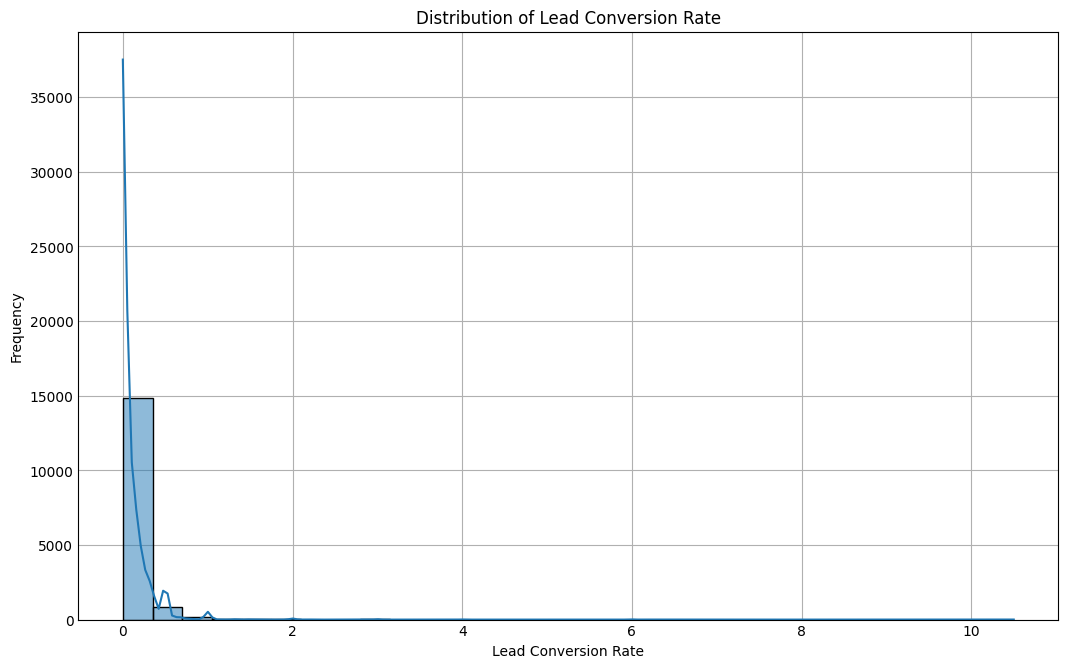

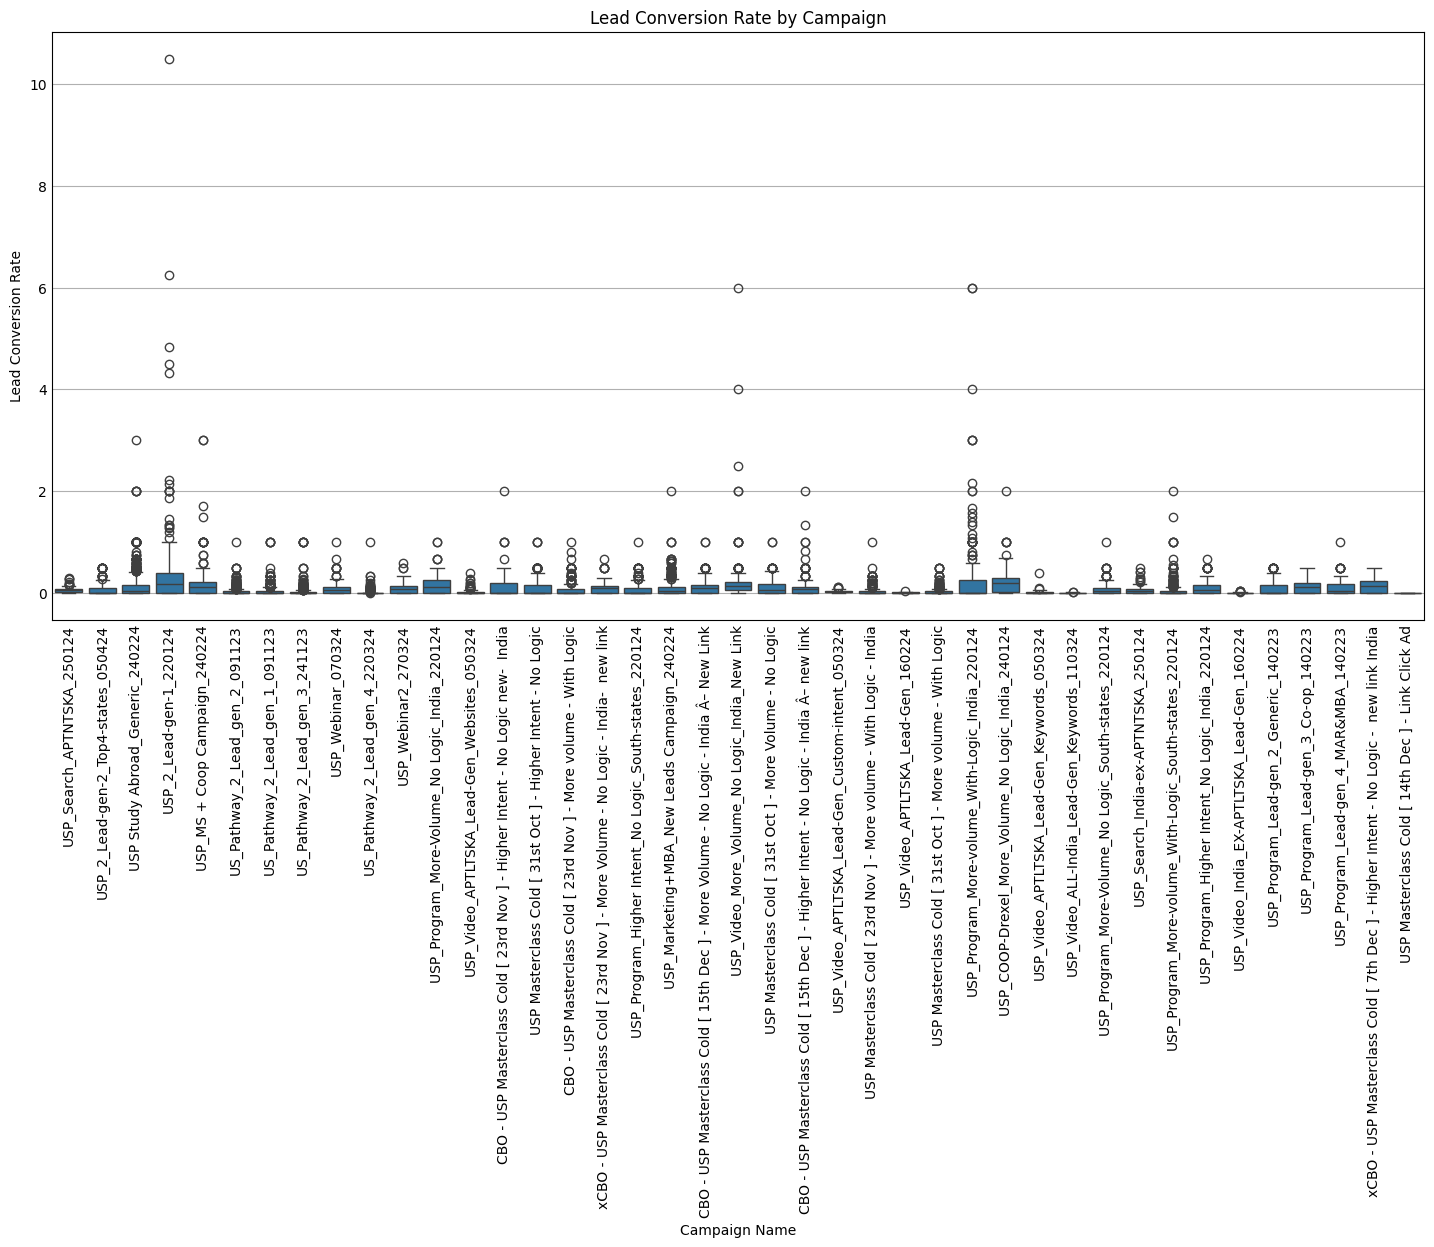

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Lead Conversion Rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['lead_conversion_rate'].dropna(), kde=True, bins=30)
plt.title('Distribution of Lead Conversion Rate')
plt.xlabel('Lead Conversion Rate')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Lead Conversion Rate by campaign
plt.figure(figsize=(14, 6))
sns.boxplot(x='campaign_name', y='lead_conversion_rate', data=data)
plt.title('Lead Conversion Rate by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Lead Conversion Rate')
plt.xticks(rotation=90)
plt.show()


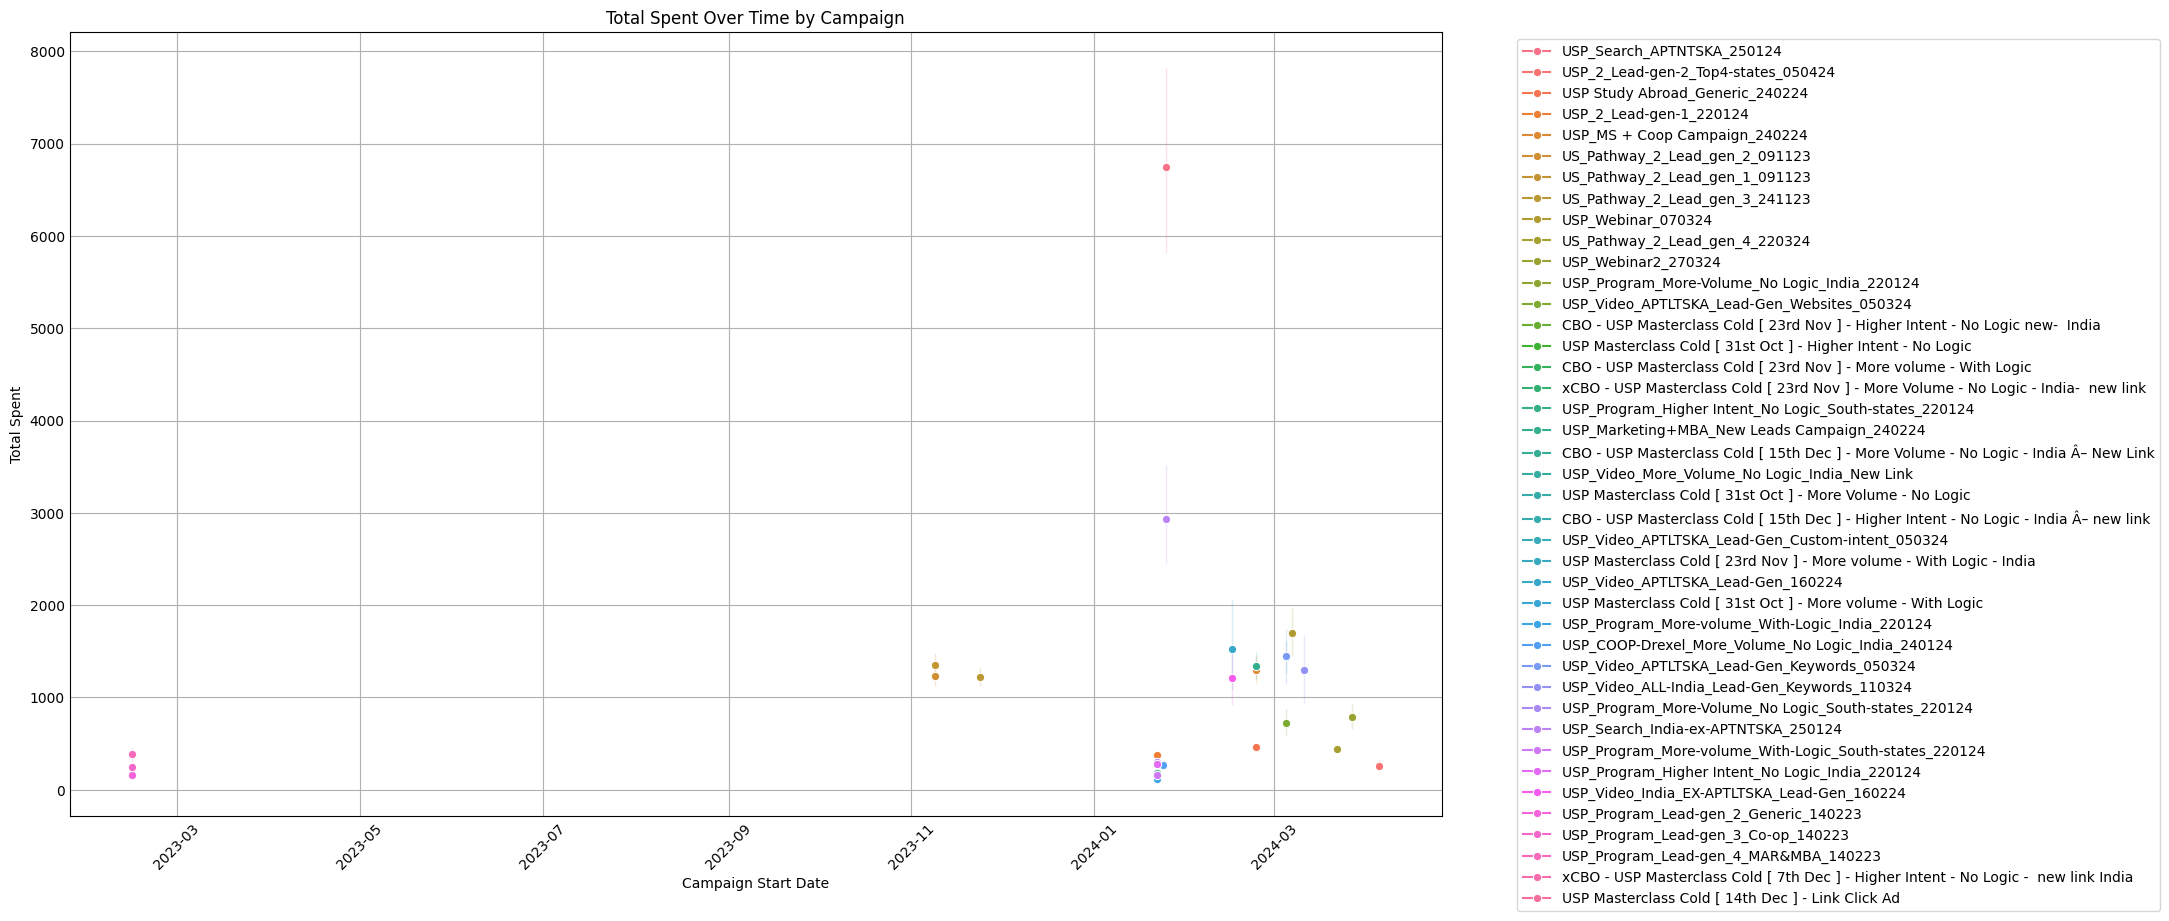

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the campaign_start_date to datetime
data['campaign_start_date'] = pd.to_datetime(data['campaign_start_date'], errors='coerce')

# Line plot of total spent over time by campaign
plt.figure(figsize=(14, 8))
sns.lineplot(x='campaign_start_date', y='total_spent', hue='campaign_name', data=data, marker='o')
plt.title('Total Spent Over Time by Campaign')
plt.xlabel('Campaign Start Date')
plt.ylabel('Total Spent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


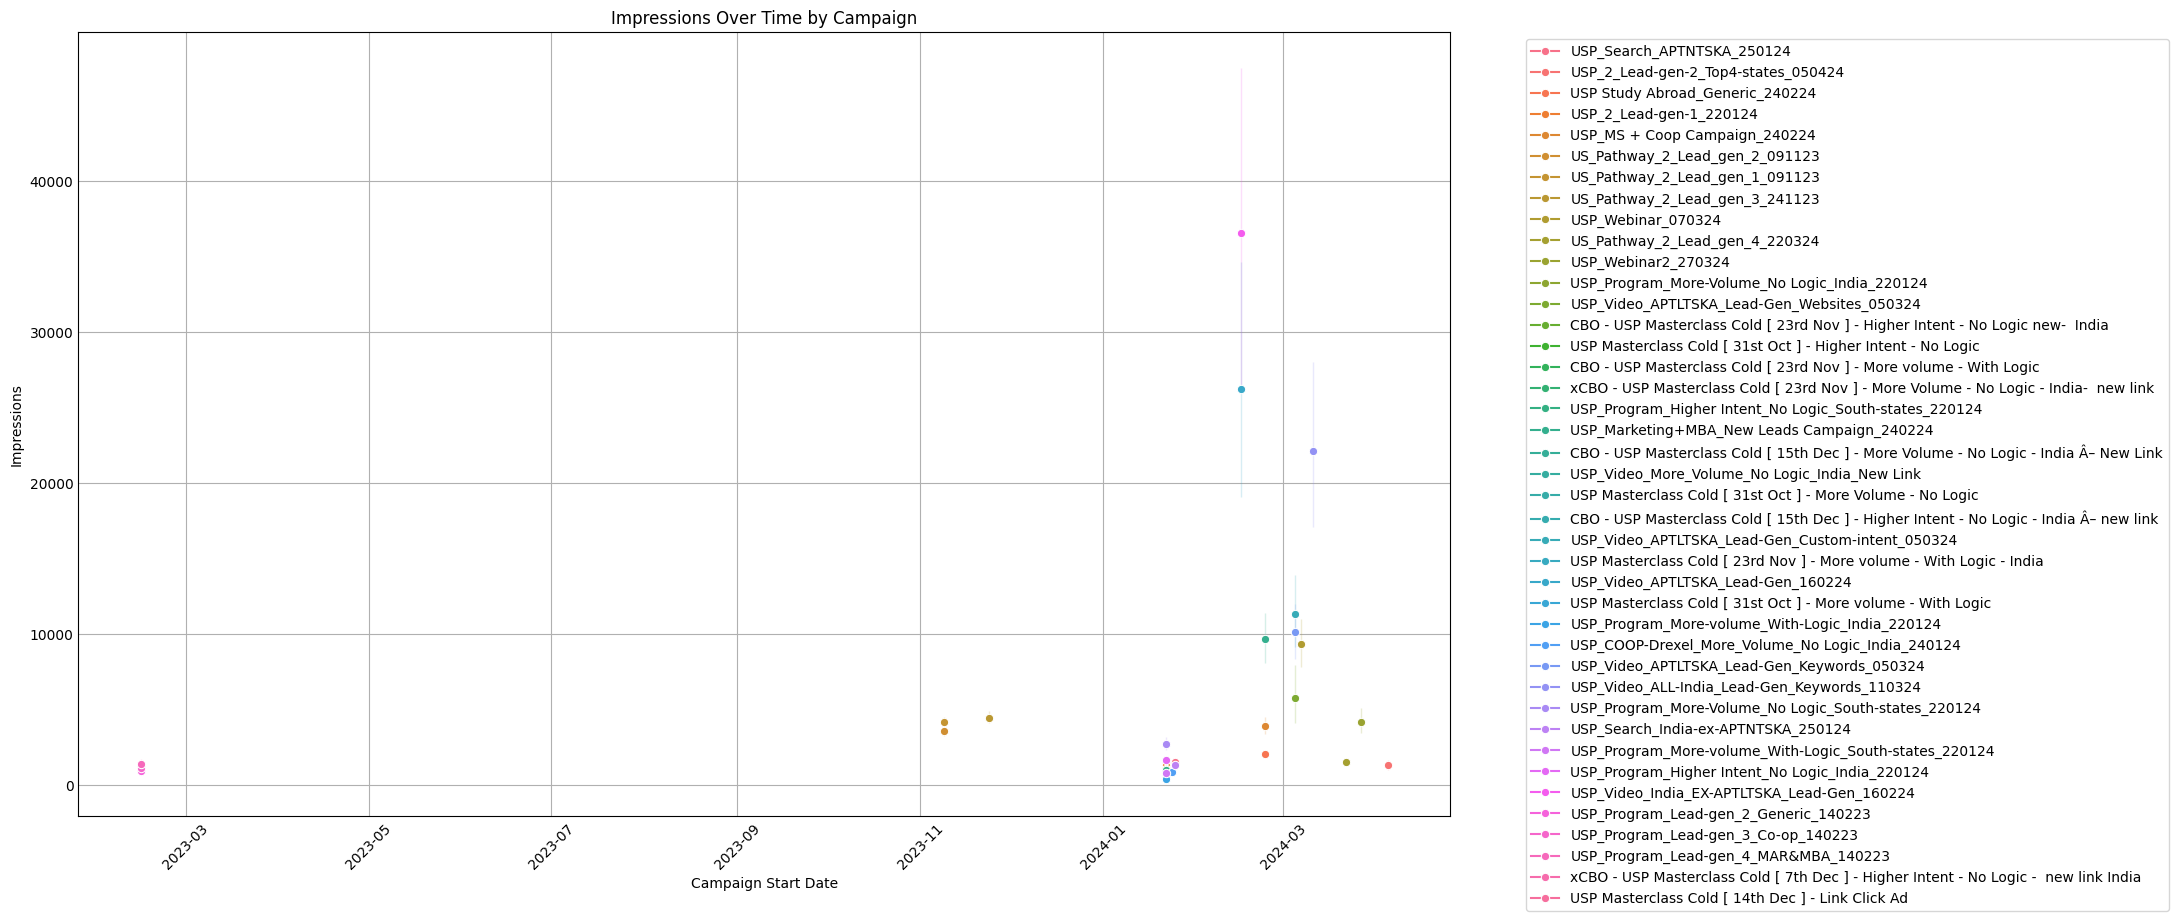

In [ ]:
# Line plot of impressions over time by campaign
plt.figure(figsize=(14, 8))
sns.lineplot(x='campaign_start_date', y='impressions', hue='campaign_name', data=data, marker='o')
plt.title('Impressions Over Time by Campaign')
plt.xlabel('Campaign Start Date')
plt.ylabel('Impressions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


ValueError: could not convert string to float: 'US_Pathway_2_Lead_gen_2_091123'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['campaign_name', 'platform'])

# Split data
X = df_encoded.drop('leads', axis=1)
y = df_encoded['leads']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

TypeError: Cannot cast DatetimeArray to dtype float64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['platform'] = label_encoder.fit_transform(df['platform'])

In [ ]:
print(df.dtypes)

dates                  datetime64[ns]
campaign_name                  object
campaign_start_date            object
creative_name                  object
total_spent                   float64
impressions                     int64
clicks                          int64
click_through_rate            float64
leads                         float64
platform                        int64
adset_name                     object
dtype: object


In [ ]:
# Handle missing values (example: fill NaN with 'Unknown')
data.fillna('Unknown', inplace=True)

# One-Hot Encoding for categorical variables
categorical_features = ['campaign_name', 'creative_name', 'platform', 'adset_name']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Define features and target variable
X = data.drop('leads', axis=1)
y = data['leads']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

TypeError: Cannot cast DatetimeArray to dtype float64

In [ ]:
# Extract features from the datetime column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

# Drop the original datetime column
df = df.drop('date', axis=1)

KeyError: 'date'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Fill missing values
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

# One-Hot Encoding for categorical variables
categorical_features = ['campaign_name', 'creative_name', 'platform', 'adset_name']
one_hot = OneHotEncoder(handle_unknown='ignore')

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot, categorical_features),
        ('num', imputer, ['total_spent', 'impressions', 'clicks', 'click_through_rate'])  # Add other numerical columns here
    ])

# Define features and target variable
X = data.drop('leads', axis=1)
y = data['leads']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Example: Extracting date parts from campaign_start_date
X_train['campaign_start_date'] = pd.to_datetime(X_train['campaign_start_date'], errors='coerce')
X_train['campaign_month'] = X_train['campaign_start_date'].dt.month
X_train['campaign_day'] = X_train['campaign_start_date'].dt.day
X_train = X_train.drop(columns=['campaign_start_date'])

# Repeat for X_test
X_test['campaign_start_date'] = pd.to_datetime(X_test['campaign_start_date'], errors='coerce')
X_test['campaign_month'] = X_test['campaign_start_date'].dt.month
X_test['campaign_day'] = X_test['campaign_start_date'].dt.day
X_test = X_test.drop(columns=['campaign_start_date'])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))


ValueError: A given column is not a column of the dataframe